In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

In [2]:
df=pd.read_excel(r"D:\data science\data science assg\ass.18 Forecasting\CocaCola_Sales_Rawdata.xlsx", header = 0, index_col = 0, parse_dates = True)
df.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [3]:
df.shape

(42, 1)

# Visualization 

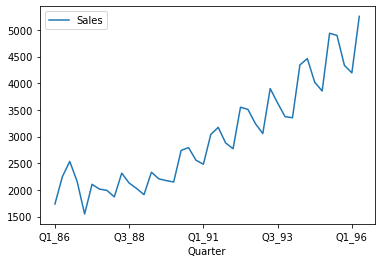

In [4]:
df.plot()
pyplot.show()

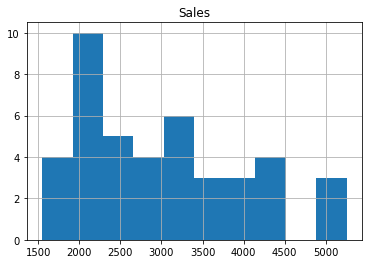

In [5]:
df.hist()
pyplot.show()

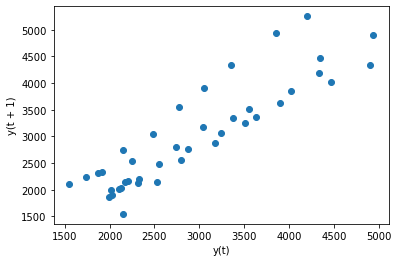

In [6]:
from pandas.plotting import lag_plot
lag_plot(df)
pyplot.show()

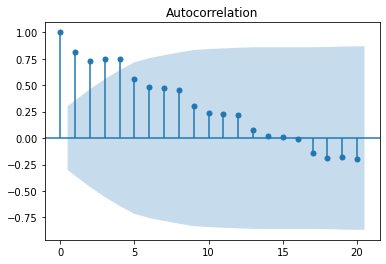

In [7]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df,lags=20)
pyplot.show()

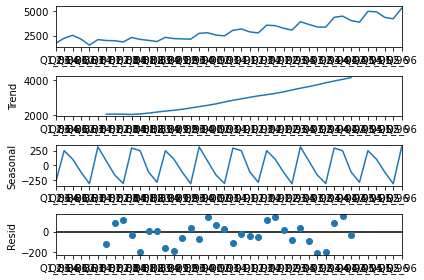

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(df, period = 12)
decompose_ts_add.plot()
pyplot.show()

<function matplotlib.pyplot.show(close=None, block=None)>

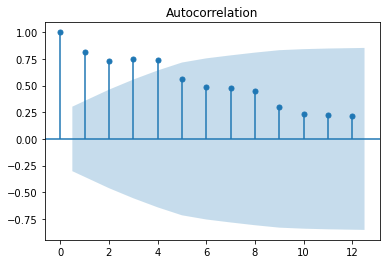

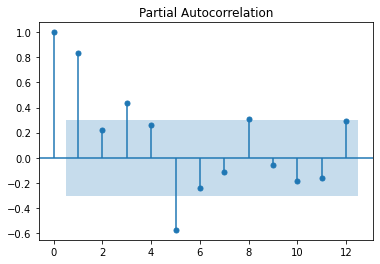

In [9]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df, lags = 12)
tsa_plots.plot_pacf(df, lags = 12)
pyplot.show

In [10]:
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings

In [11]:
Train = df.head(30)
Test = df.tail(12)

In [12]:
def RMSE(pred):
    rmse = np.sqrt(np.mean((np.array(Test['Sales']) - np.array(pred))**2))
    return rmse

In [13]:
def MAPE(pred, org):
    temp = np.abs((pred-org)/ org)*100
    return np.mean(temp)

In [14]:
# Simple Exponential Model
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
df=pd.read_excel(r"D:\data science\data science assg\ass.18 Forecasting\CocaCola_Sales_Rawdata.xlsx")
train = df.head(30)
test = df.tail(12)
start = test.index[0]
end = test.index[-1]
ses_model = SimpleExpSmoothing(train.Sales).fit(smoothing_level = 0.2)
pred_ses = ses_model.predict(start = start, end = end)
print('The MAPE value is:', MAPE(pred_ses, test.Sales))
print('The RMSE value is:', RMSE(pred_ses))

The MAPE value is: 22.04676208763459
The RMSE value is: 1153.7031139985947


C:\Users\91832\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [15]:
# Holt model
from statsmodels.tsa.holtwinters import Holt
hw_model = Holt(train.Sales).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = start, end = end)
print('MAPE value is :', MAPE(pred_hw, test.Sales))
print('RMSE value is :', RMSE(pred_hw))

MAPE value is : 11.213840900969231
RMSE value is : 559.5200586701441


<ipython-input-15-35054f1be054>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(train.Sales).fit(smoothing_level=0.8, smoothing_slope=0.2)


In [16]:
# Holt's winter exponential smoothing with additive seasonality and additive trend
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hw_model_add_add = ExponentialSmoothing(train.Sales, seasonal = 'add', trend = 'add', seasonal_periods = 12).fit()
pred_hw_add_add = hw_model_add_add.predict(start = start, end = end)
print('MAPE value is:', MAPE(pred_hw_add_add, test.Sales))
print('RMSE value is:', RMSE(pred_hw_add_add))

MAPE value is: 7.721564270404666
RMSE value is: 422.03817482791186


In [17]:
# Holt's Winter Exponential Smoothing with Multiplicative Seasonality and Additive Trend
hw_model_mul_add = ExponentialSmoothing(train.Sales, seasonal = 'mul', trend = 'add', seasonal_periods = 12).fit()
pred_hw_mul_add = hw_model_mul_add.predict(start = start, end = end)
print('MAPE value is:', MAPE(pred_hw_mul_add, test.Sales))
print('RMSE value is :', RMSE(pred_hw_mul_add))

MAPE value is: 4.76289140146596
RMSE value is : 230.6605645056697


In [18]:
final_model = ExponentialSmoothing(df.Sales, seasonal = 'add', trend = 'add', seasonal_periods = 12).fit()
final_model.forecast(10)

42    4952.599860
43    4771.758098
44    4801.779667
45    5676.634556
46    5713.163216
47    5290.665128
48    5166.840196
49    6122.570866
50    6007.644296
51    5541.894870
dtype: float64

# ARIMA MODEL

# Data is seasonal ,so we use SARIMAX

In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX  
import warnings
warnings.filterwarnings("ignore")
model = SARIMAX(train['Sales'], order = (0, 1, 1), seasonal_order =(2, 1, 1, 12))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   30
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -117.493
Date:                            Sun, 11 Apr 2021   AIC                            244.985
Time:                                    01:35:55   BIC                            249.152
Sample:                                         0   HQIC                           245.400
                                             - 30                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0873      0.270      0.324      0.746      -0.442       0.616
ar.S.L12       0.5486      7.552      0.073      0.942     -14.254      15.351
ar.S.L24       0.4496      7.324      0.061      0.951     -13.905      14.804
ma.S.L12      -1.0000      5.294     -0.189      0.850     -11.375       9.375
sigma2      5.175e+04      0.000   4.41e+08      0.000    5.18e+04    5.18e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 0.35
Prob(Q):                              0.72   Prob(JB):                         0.84
Heteroskedasticity (H):               0.41   Skew:                             0.04
Prob(H) (two-sided):                  0.31   Kurtosis:                         2.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.17e+26. Standard errors may be unstable.
"""

<AxesSubplot:>

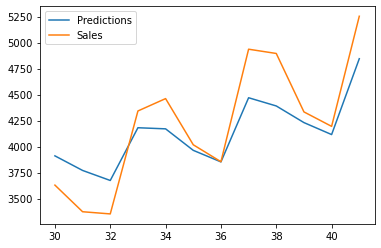

In [20]:
predictions = result.predict(start = test.index[0], end = test.index[-1], typ = 'levels').rename("Predictions")
predictions.plot(legend = True)
test['Sales'].plot(legend = True)

In [21]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
rmse(test["Sales"], predictions)
mean_squared_error(test["Sales"], predictions)

92513.03850545276

<AxesSubplot:>

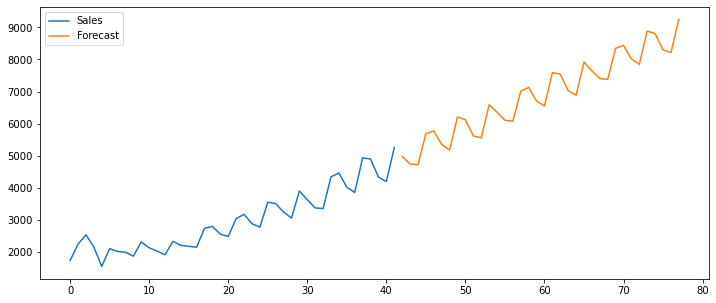

In [22]:
model = model = SARIMAX(df['Sales'], order = (0, 1, 1), seasonal_order = (2, 1, 1, 12))
result = model.fit()
forecast = result.predict(start = len(df), end = (len(df)-1) + 3 * 12, typ = 'levels').rename('Forecast')
df['Sales'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

In [23]:
forecast.head(10)

42    4975.970630
43    4742.765426
44    4715.066700
45    5686.803361
46    5771.668417
47    5350.210588
48    5177.731013
49    6208.661885
50    6118.318135
51    5618.091748
Name: Forecast, dtype: float64

In [24]:
RMSE(predictions)

304.15956093052995

In [25]:
MAPE(predictions, test.Sales)

6.044417894127693

In [26]:
data = {'MODEL': pd.Series(['rmse_Simple_Exponential', 'rmse_Holts', 'rmse_holts_winter_add_add', 'rmse_holts_winter_mul_add', 'rmse_ARIMA']), 
        "rmse_values":pd.Series([RMSE(pred_ses), RMSE(pred_hw), RMSE(pred_hw_add_add), RMSE(pred_hw_mul_add), RMSE(predictions)])}
table_rmse = pd.DataFrame(data)
table_rmse.sort_values(['rmse_values'])

,MODEL,rmse_values
3,rmse_holts_winter_mul_add,230.660565
4,rmse_ARIMA,304.159561
2,rmse_holts_winter_add_add,422.038175
1,rmse_Holts,559.520059
0,rmse_Simple_Exponential,1153.703114


In [27]:
data = {'MODEL': pd.Series(['MAPE_Simple_Exponential', 'MAPE_Holts', 'MAPE_holts_winter_add_add', 'MAPE_holts_winter_mul_add', 'MAPE_ARIMA']), 
        "MAPE_values":pd.Series([MAPE(pred_ses,test.Sales), MAPE(pred_hw,test.Sales), MAPE(pred_hw_add_add,test.Sales), MAPE(pred_hw_mul_add,test.Sales), MAPE(predictions, test.Sales)])}
table_rmse = pd.DataFrame(data)
table_rmse.sort_values(['MAPE_values'])

,MODEL,MAPE_values
3,MAPE_holts_winter_mul_add,4.762891
4,MAPE_ARIMA,6.044418
2,MAPE_holts_winter_add_add,7.721564
1,MAPE_Holts,11.213841
0,MAPE_Simple_Exponential,22.046762


# From the above table we can conclude that the Holt's Winter Exponential Smoothing with additive seasonality and trend model is best suitable for the Coca-Cola Data